### Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)

### Loading Data and Preprocessing

In [14]:
# Read the data
df = pd.read_csv("data.csv", low_memory=False)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


#### Data Overview

In [15]:
# Check all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [16]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


#### Remove unwanted columns

In [17]:
# Remove unwanted columns
unwated_columns = ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
df = df.drop(unwated_columns, 1)

# Drop rows with no data
df = df.dropna(how='all')

df.info()

/var/folders/ct/krzz24hj5m3dtk4zh4l2xwd00000gn/T/ipykernel_37871/3355159607.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(unwated_columns, 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

#### Rename Columns

In [18]:
# Remove Leading and Trailing space with MV

renamedColumns = {
  ' MV ': 'MV',
  'category_name_1': 'category',
}

df.rename(columns=renamedColumns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category               584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-nu

#### Changing Data Types

In [19]:
# Do we need to change Data type of any other column?
df['qty_ordered'] = df['qty_ordered'].astype('int')
df['Working Date'] = pd.to_datetime(df['Working Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  object        
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int64         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category               584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

#### Remove orders that have values in Negative

In [20]:
df = df[df['grand_total'] >= 0]
df = df[df['discount_amount'] >= 0]
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584445.000000,5.844450e+05,584445.000000,5.844450e+05,584445.000000,584445.000000,584445.000000,584434.000000
mean,565651.294474,6.349204e+03,1.296394,8.531792e+03,499.476409,2017.044062,7.167703,45792.446204
std,200123.324086,1.494997e+04,3.996323,6.132487e+04,1507.016332,0.707365,3.486312,34415.334452
min,211131.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2016.000000,1.000000,1.000000
25%,394975.000000,3.600000e+02,1.000000,9.452000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568391.000000,8.990000e+02,1.000000,1.961320e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739100.000000,4.070000e+03,1.000000,6.999000e+03,160.191900,2018.000000,11.000000,73540.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


### Question: 1
#### What is the best selling category?

In [31]:
# What is the best selling category?
top_categories = df.groupby(['category', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
top_categories


,category,Year,count
28,Mobiles & Tablets,2017.0,59715
25,Men's Fashion,2017.0,49498
43,Women's Fashion,2017.0,35202
29,Mobiles & Tablets,2018.0,33697
1,Appliances,2017.0,27131
40,Superstore,2017.0,26999
24,Men's Fashion,2016.0,25408
32,Others,2018.0,24014
27,Mobiles & Tablets,2016.0,22289
4,Beauty & Grooming,2017.0,18438


Text(0.5, 1.0, 'Best Selling Categories')

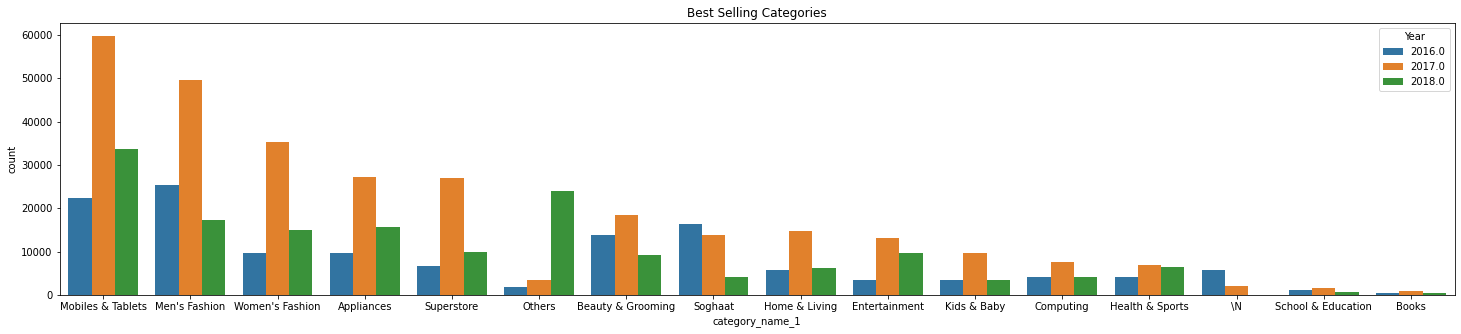

In [ ]:
plt.figure(figsize=(25,5))
graph = sns.barplot(x='category_name_1', y='count', data=top_categories, hue="Year")
graph.set_title("Best Selling Categories")

### Question: 2
#### How many orders are completed, Cancelled, refunded?

In [ ]:
order_status_frequency = df.groupby(['status', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by="count", ascending=False)
order_status_frequency

,status,Year,count
10,complete,2017.0,123489
2,canceled,2017.0,94981
9,complete,2016.0,74610
3,canceled,2018.0,67004
28,received,2018.0,40286
1,canceled,2016.0,39264
11,complete,2018.0,35586
27,received,2017.0,34119
18,order_refunded,2017.0,32541
17,order_refunded,2016.0,14053


Text(0.5, 1.0, 'Order Status Frequency')

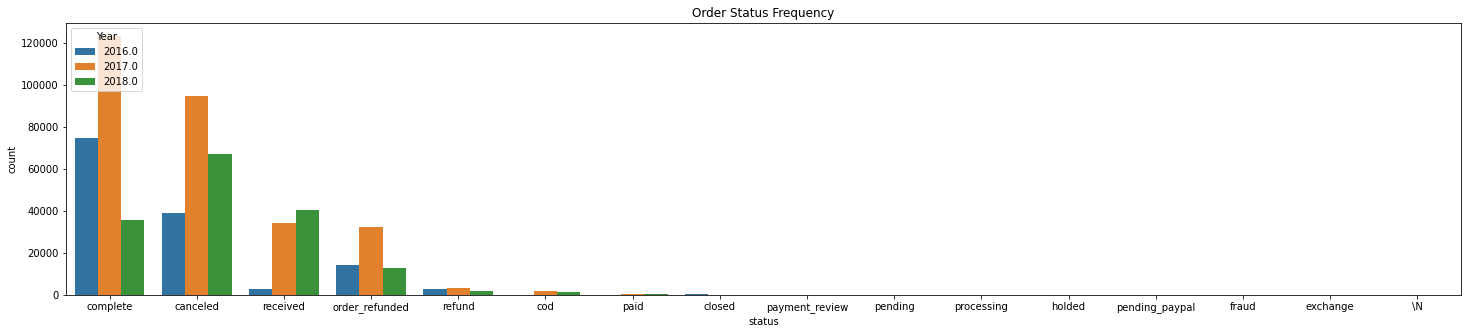

In [ ]:
plt.figure(figsize=(25,5))
graph = sns.barplot(x='status', y='count', data=order_status_frequency, hue='Year')
graph.set_title("Order Status Frequency")

### Question: 3
#### Which payment method was used most often?

In [ ]:
top_payment_methods = df.groupby(["payment_method", 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by="count", ascending=False)
top_payment_methods

,payment_method,Year,count
13,cod,2017.0,139987
12,cod,2016.0,76741
14,cod,2018.0,55232
0,Easypay,2017.0,52659
5,Payaxis,2017.0,48936
1,Easypay,2018.0,30241
4,Payaxis,2016.0,27068
9,bankalfalah,2018.0,23059
18,easypay_voucher,2017.0,22679
6,Payaxis,2018.0,21637


Text(0.5, 1.0, 'top_payment_methods')

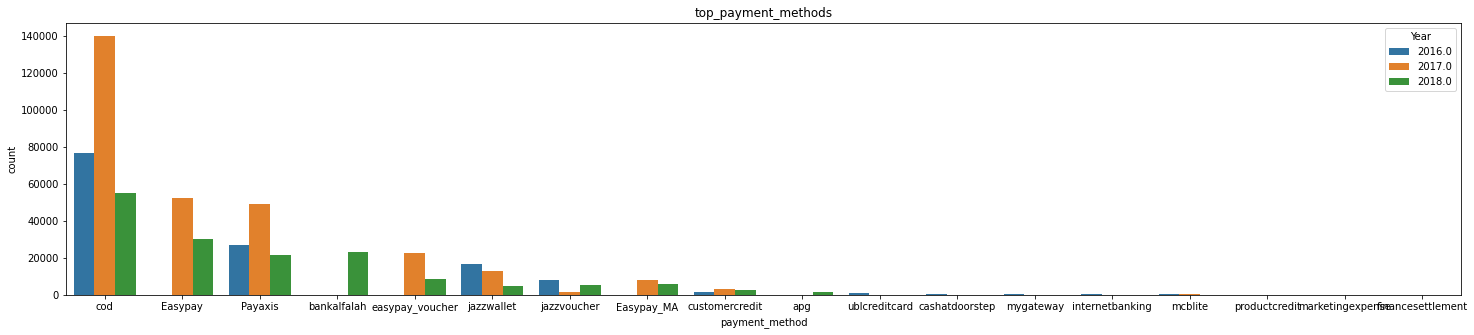

In [ ]:
plt.figure(figsize=(25,5))
graph = sns.barplot(x='payment_method', y='count', data=top_payment_methods, hue="Year")
graph.set_title("top_payment_methods")

### Question: 4
#### Which category has most cancelled orders?

In [ ]:
# which category has most cancelled orders?
orders_status_category = df.groupby(['status', 'category_name_1', 'Year'])['item_id'].count().reset_index()

Text(0.5, 1.0, 'Orders cancelled with respect to categories')

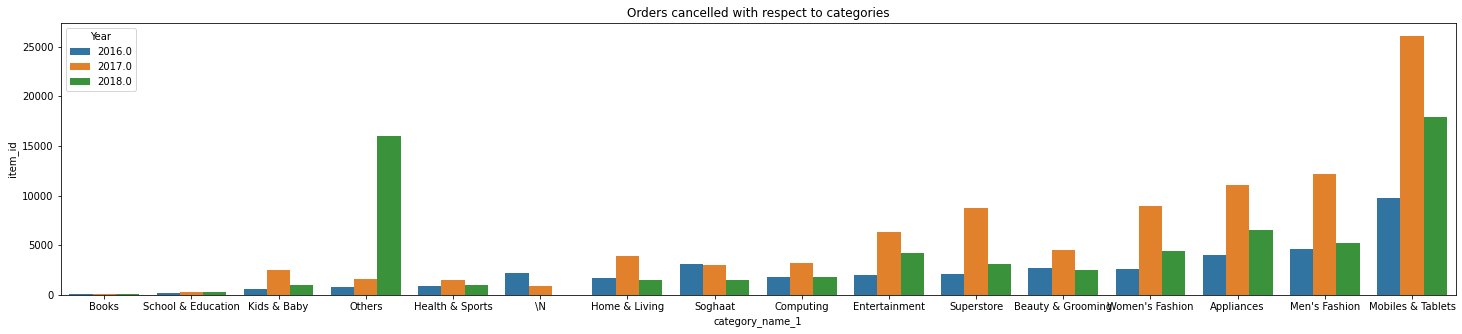

In [ ]:
mask = orders_status_category[orders_status_category['status'] == 'canceled'].sort_values(by="item_id")
plt.figure(figsize=(25,5))
graph = sns.barplot(x='category_name_1', y='item_id', data=mask, hue="Year")
graph.set_title("Orders cancelled with respect to categories")

Text(0.5, 1.0, 'Orders completed with respect to categories')

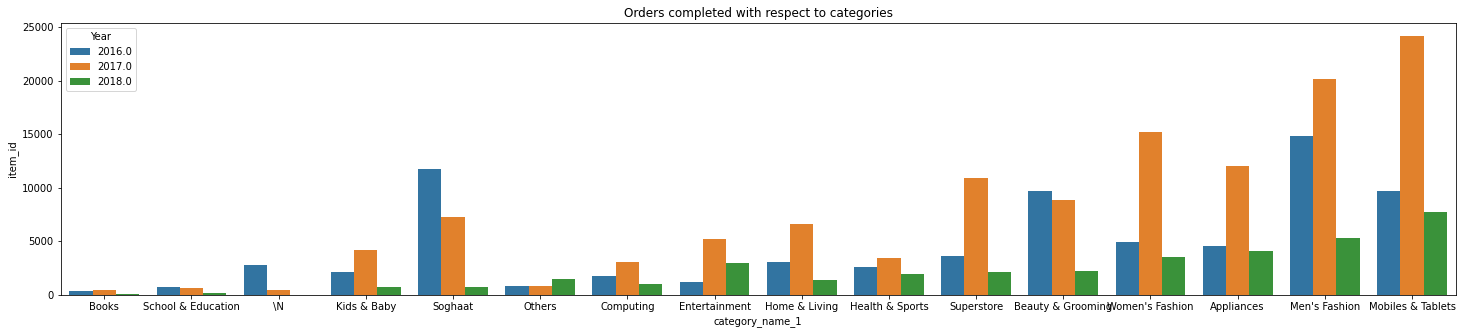

In [ ]:
mask = orders_status_category[orders_status_category['status'] == 'complete'].sort_values(by="item_id")
# orders_status_category['status'].value_counts()
plt.figure(figsize=(25,5))
graph = sns.barplot(x='category_name_1', y='item_id', data=mask, hue='Year')
graph.set_title("Orders completed with respect to categories")

### Question: 5
#### Which Category has most amount of sales?

In [ ]:
import decimal
# https://stackoverflow.com/questions/25099626/convert-scientific-notation-to-float
def formatSum(x):
  return format(x, 'f')
# tmp = 
# print('[0]', (tmp))

In [ ]:
category_amount = df.groupby(['category_name_1', 'Year'])['grand_total'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
category_amount['sum'] = category_amount['sum']
category_amount

,category_name_1,Year,sum
29,Mobiles & Tablets,2018.0,1.095149e+09
28,Mobiles & Tablets,2017.0,1.093863e+09
1,Appliances,2017.0,2.859426e+08
2,Appliances,2018.0,2.764508e+08
13,Entertainment,2017.0,2.539243e+08
27,Mobiles & Tablets,2016.0,2.517790e+08
14,Entertainment,2018.0,2.192973e+08
32,Others,2018.0,1.765284e+08
43,Women's Fashion,2017.0,1.763799e+08
25,Men's Fashion,2017.0,1.092396e+08


### Question: 6
#### Top customers who cancelled most orders

In [ ]:
df['status'].value_counts()

complete          233658
canceled          201229
received           77280
order_refunded     59525
refund              8032
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

In [28]:
customerAnalysis = df.groupby(['Customer ID', 'status'])['grand_total'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
customerAnalysis[customerAnalysis['status'] == 'canceled']

,Customer ID,status,count
130843,87724.0,canceled,685
143803,96927.0,canceled,590
61568,39707.0,canceled,496
43375,26527.0,canceled,484
99971,65910.0,canceled,421
...,...,...,...
74485,48224.0,canceled,1
74479,48218.0,canceled,1
74477,48217.0,canceled,1
74465,48211.0,canceled,1


Text(0.5, 1.0, 'Top customer who cancelled most Order with respect to categories')

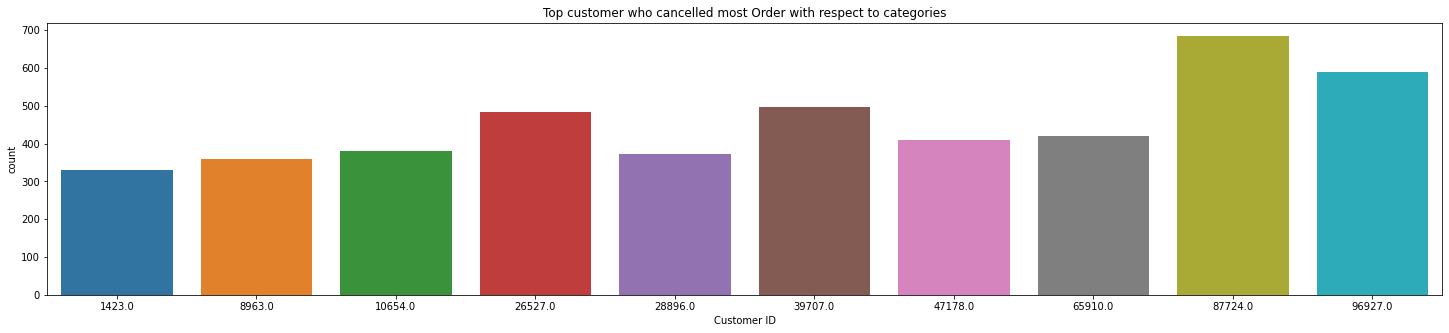

In [29]:
mask = customerAnalysis[customerAnalysis['status'] == 'canceled']
plt.figure(figsize=(25,5))
graph = sns.barplot(x='Customer ID', y='count', data=mask.head(10))
graph.set_title("Top customer who cancelled most Order with respect to categories")